In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing dataset
telecom_data = pd.read_csv("churn_data.csv")

In [3]:
telecom_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telecom_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

### Data Preparation

In [6]:
# Converting Yes to 1 and No to 0
telecom_data['PhoneService'] = telecom_data['PhoneService'].map({'Yes': 1, 'No': 0})
telecom_data['PaperlessBilling'] = telecom_data['PaperlessBilling'].map({'Yes': 1, 'No': 0})
telecom_data['Churn'] = telecom_data['Churn'].map({'Yes': 1, 'No': 0})
telecom_data['Partner'] = telecom_data['Partner'].map({'Yes': 1, 'No': 0})
telecom_data['Dependents'] = telecom_data['Dependents'].map({'Yes': 1, 'No': 0})
telecom_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


### Dummy Variable Creation

In [7]:
# Creating a dummy variables and dropping the first one.

cont = pd.get_dummies(telecom_data['Contract'],prefix='Contract',drop_first=True)
telecom_data = pd.concat([telecom_data,cont],axis=1)   

pm = pd.get_dummies(telecom_data['PaymentMethod'],prefix='PaymentMethod',drop_first=True)
telecom_data = pd.concat([telecom_data,pm],axis=1)

gdr = pd.get_dummies(telecom_data['gender'],prefix='gender',drop_first=True)
telecom_data = pd.concat([telecom_data,gdr],axis=1)


ml = pd.get_dummies(telecom_data['MultipleLines'],prefix='MultipleLines')
ml1 = ml.drop(['MultipleLines_No phone service'],1)
telecom_data = pd.concat([telecom_data,ml1],axis=1)


ins = pd.get_dummies(telecom_data['InternetService'],prefix='InternetService',drop_first=True)
telecom_data = pd.concat([telecom_data,ins],axis=1)


os = pd.get_dummies(telecom_data['OnlineSecurity'],prefix='OnlineSecurity')
os1= os.drop(['OnlineSecurity_No internet service'],1)
telecom_data = pd.concat([telecom_data,os1],axis=1)


ob =pd.get_dummies(telecom_data['OnlineBackup'],prefix='OnlineBackup')
ob1 =ob.drop(['OnlineBackup_No internet service'],1)
telecom_data = pd.concat([telecom_data,ob1],axis=1)


dp =pd.get_dummies(telecom_data['DeviceProtection'],prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'],1)
telecom_data = pd.concat([telecom_data,dp1],axis=1)

 
ts =pd.get_dummies(telecom_data['TechSupport'],prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'],1)
telecom_data = pd.concat([telecom_data,ts1],axis=1)


st =pd.get_dummies(telecom_data['StreamingTV'],prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'],1)
telecom_data = pd.concat([telecom_data,st1],axis=1)


sm =pd.get_dummies(telecom_data['StreamingMovies'],prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'],1)
telecom_data = pd.concat([telecom_data,sm1],axis=1)


### Dropping the repeated variables

In [8]:
telecom_data = telecom_data.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)
telecom_data.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.5,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,...,1,0,1,0,1,0,1,0,1,0


In [9]:
#converting variable from string to float

telecom_data['TotalCharges'] =telecom_data['TotalCharges'].convert_objects(convert_numeric=True)
telecom_data['tenure'] = telecom_data['tenure'].astype(int).astype(float)

In [10]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
customerID                               7043 non-null object
SeniorCitizen                            7043 non-null int64
Partner                                  7043 non-null int64
Dependents                               7043 non-null int64
tenure                                   7043 non-null float64
PhoneService                             7043 non-null int64
PaperlessBilling                         7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7032 non-null float64
Churn                                    7043 non-null int64
Contract_One year                        7043 non-null uint8
Contract_Two year                        7043 non-null uint8
PaymentMethod_Credit card (automatic)    7043 non-null uint8
PaymentMethod_Electronic check           7043 non-null uint8
PaymentMethod_Mailed check      

we have all variables as integer.

### Checking for Outliers

In [11]:
# Checking for outliers in the continuous variables
num_telecom_data = telecom_data[['tenure','MonthlyCharges','TotalCharges']]

In [12]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_telecom_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
90%,69.000000,102.600000,5976.640000
95%,72.000000,107.400000,6923.590000
99%,72.000000,114.729000,8039.883000


### Checking for Missing Values and Inputing Them

In [13]:
# Adding up the missing values (column-wise)
telecom_data.isnull().sum()

customerID                                0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
MultipleLines_No                          0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [14]:
telecom_data.index

RangeIndex(start=0, stop=7043, step=1)

In [15]:
# Checking the percentage of missing values
round(100*(telecom_data.isnull().sum()/len(telecom_data.index)), 2)

customerID                               0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

It means that 11/7043 = 0.001561834 i.e 0.1%, best is to remove these observations from the analysis

In [16]:
# Removing NaN TotalCharges rows
telecom_data = telecom_data[~np.isnan(telecom_data['TotalCharges'])]

In [17]:
# Checking percentage of missing values after removing the missing values
round(100*(telecom_data.isnull().sum()/len(telecom_data.index)), 2)

customerID                               0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

### Standardisation of continuous variables

In [18]:
# Normalising continuous variables
df = telecom_data[['tenure','MonthlyCharges','TotalCharges']]

In [19]:
df.std()

tenure              24.545260
MonthlyCharges      30.085974
TotalCharges      2266.771362
dtype: float64

In [20]:
normalized_df=(df-df.mean())/df.std()
normalized_df

,tenure,MonthlyCharges,TotalCharges
0,-1.280157,-1.161611,-0.994123
1,0.064298,-0.260859,-0.173727
2,-1.239416,-0.363897,-0.959581
3,0.512450,-0.747797,-0.195234
4,-1.239416,0.196164,-0.940391
5,-0.994970,1.158407,-0.645323
6,-0.424595,0.807745,-0.147302
7,-0.913487,-1.164935,-0.874107
8,-0.180148,1.329583,0.336492
9,1.205048,-0.287450,0.531438


In [21]:
telecom_data = telecom_data.drop(['tenure','MonthlyCharges','TotalCharges'], 1)

In [22]:
telecom_data = pd.concat([telecom_data,normalized_df],axis=1)

In [23]:
telecom_data

,customerID,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),...,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,1,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,-1.280157,-1.161611,-0.994123
1,5575-GNVDE,0,0,0,1,0,0,1,0,0,...,1,1,0,1,0,1,0,0.064298,-0.260859,-0.173727
2,3668-QPYBK,0,0,0,1,1,1,0,0,0,...,0,1,0,1,0,1,0,-1.239416,-0.363897,-0.959581
3,7795-CFOCW,0,0,0,0,0,0,1,0,0,...,1,0,1,1,0,1,0,0.512450,-0.747797,-0.195234
4,9237-HQITU,0,0,0,1,1,1,0,0,0,...,0,1,0,1,0,1,0,-1.239416,0.196164,-0.940391
5,9305-CDSKC,0,0,0,1,1,1,0,0,0,...,1,1,0,0,1,0,1,-0.994970,1.158407,-0.645323
6,1452-KIOVK,0,0,1,1,1,0,0,0,1,...,0,1,0,0,1,1,0,-0.424595,0.807745,-0.147302
7,6713-OKOMC,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,-0.913487,-1.164935,-0.874107
8,7892-POOKP,0,1,0,1,1,1,0,0,0,...,1,0,1,0,1,0,1,-0.180148,1.329583,0.336492
9,6388-TABGU,0,0,1,1,0,0,1,0,0,...,0,1,0,1,0,1,0,1.205048,-0.287450,0.531438


### Checking the Churn Rate

In [24]:
churn_rate = (sum(telecom_data['Churn'])/len(telecom_data['Churn'].index))*100

In [25]:
churn_rate

26.578498293515356

We have almost 27% churn rate

In [26]:
telecom_data.shape

(7032, 32)

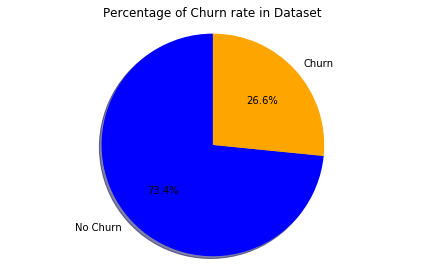

In [27]:
# Churn Rate
labels = ['No Churn', 'Churn']
sizes = telecom_data['Churn'].value_counts(sort = True)
colors = ['blue' ,'orange']
plt.pie(sizes, colors=colors, labels = labels,autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Percentage of Churn rate in Dataset')
plt.axis('equal')
plt.tight_layout ()
plt.show()

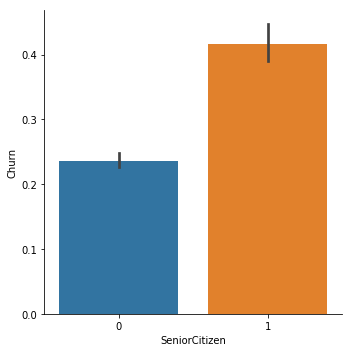

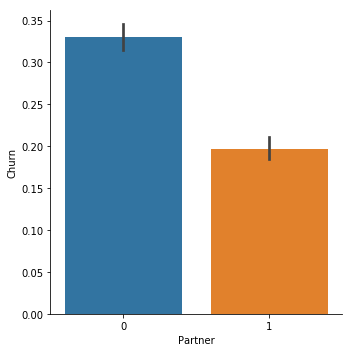

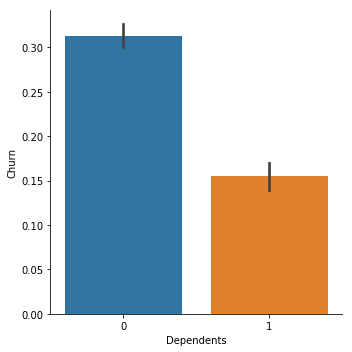

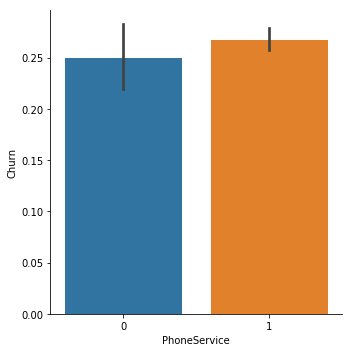

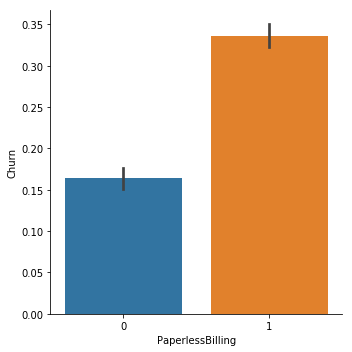

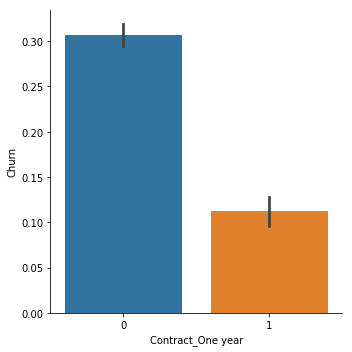

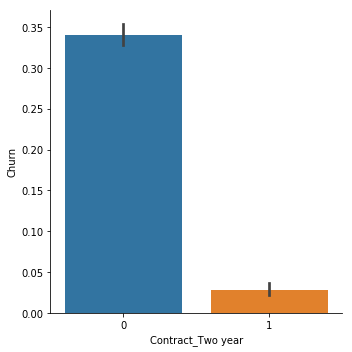

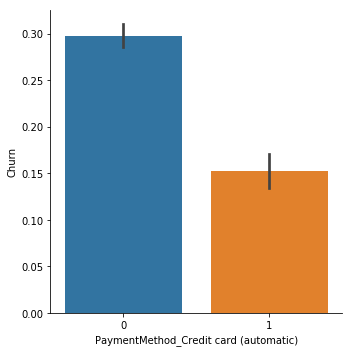

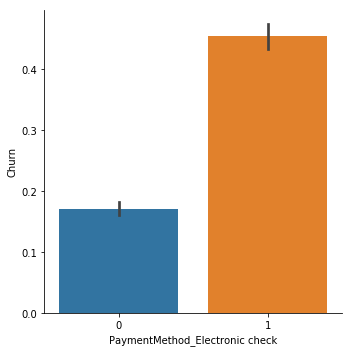

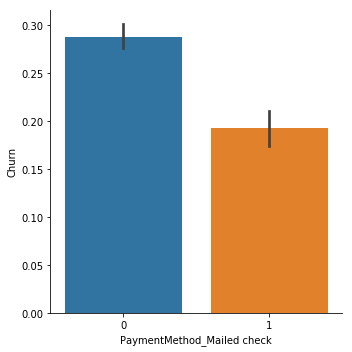

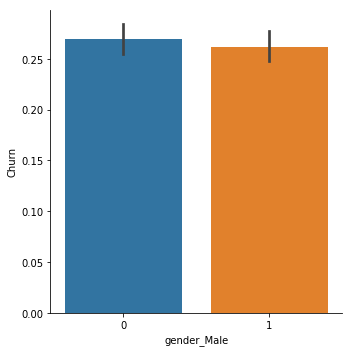

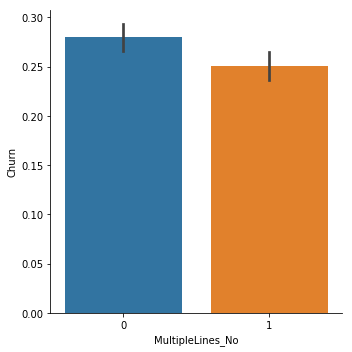

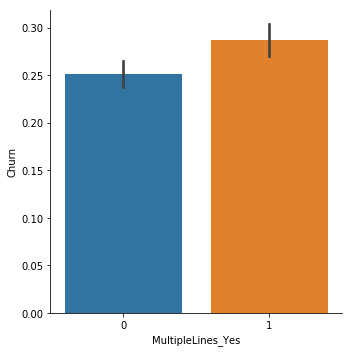

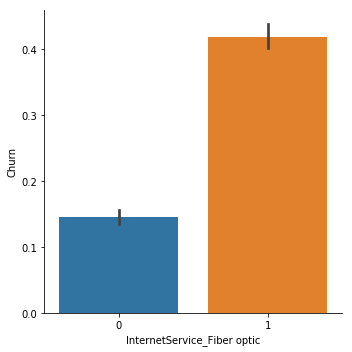

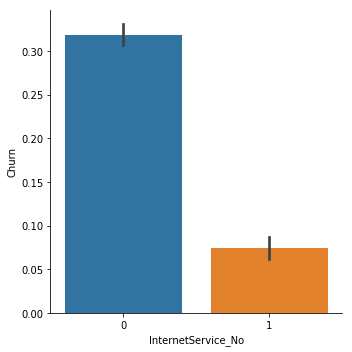

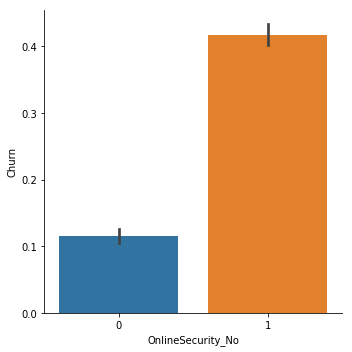

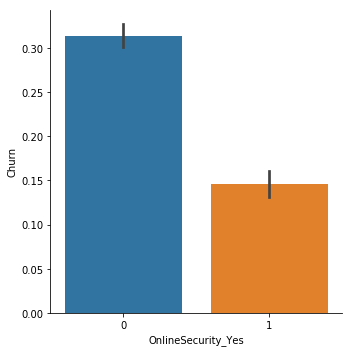

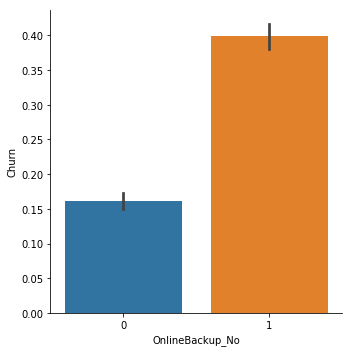

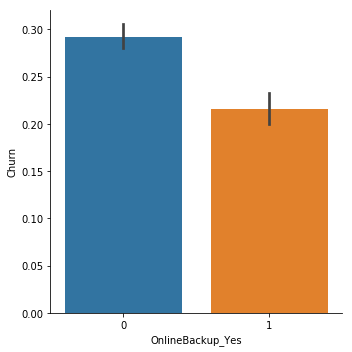

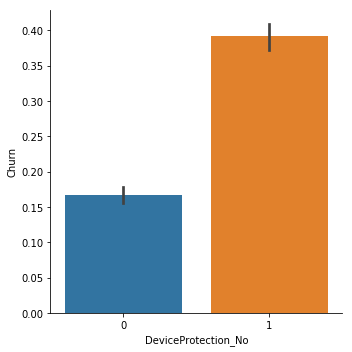

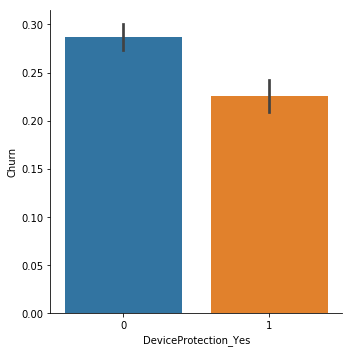

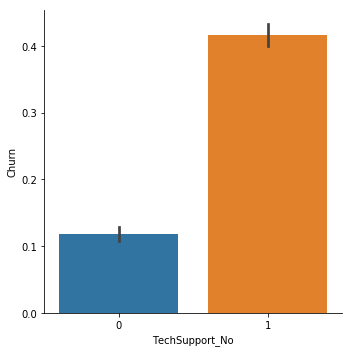

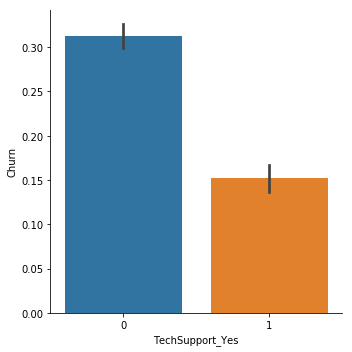

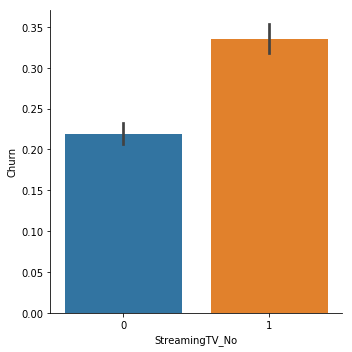

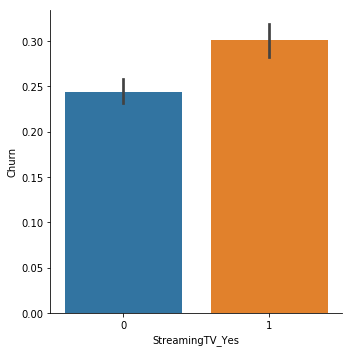

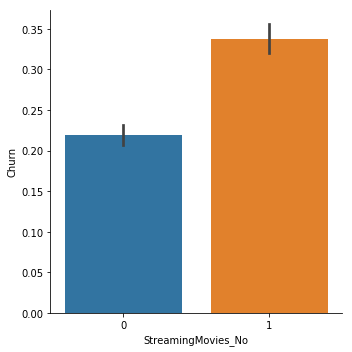

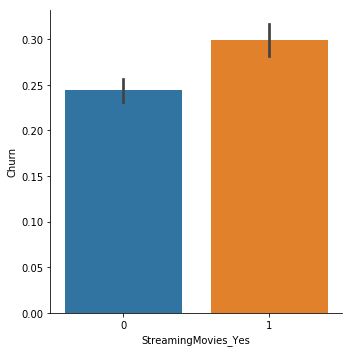

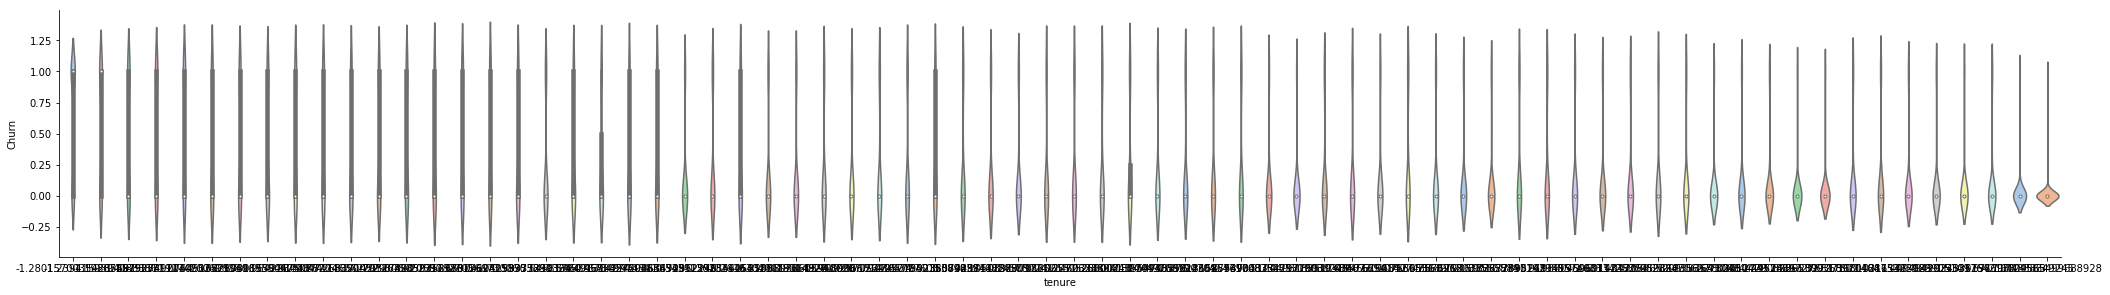

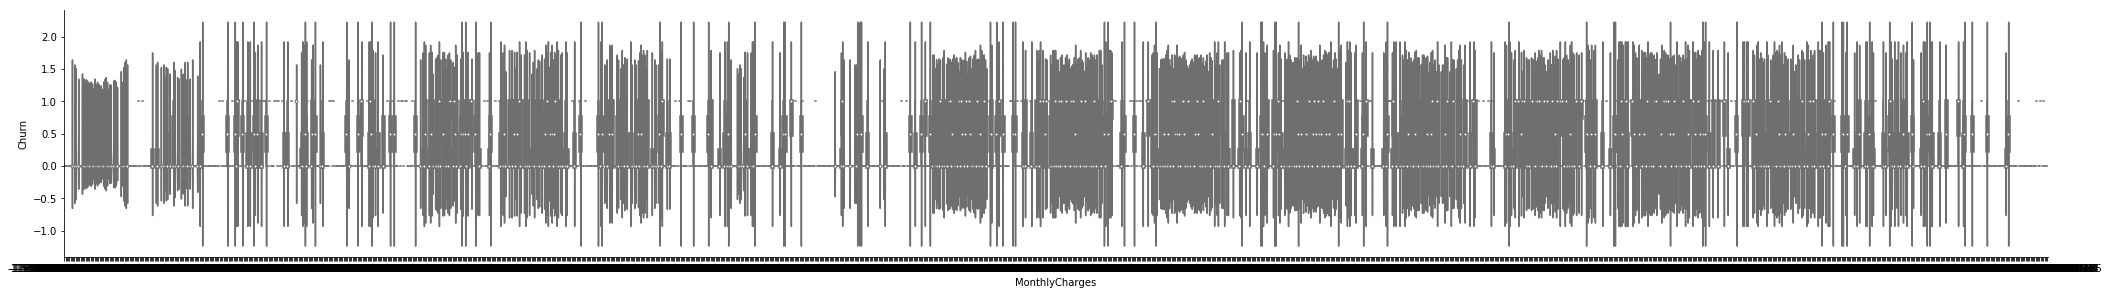

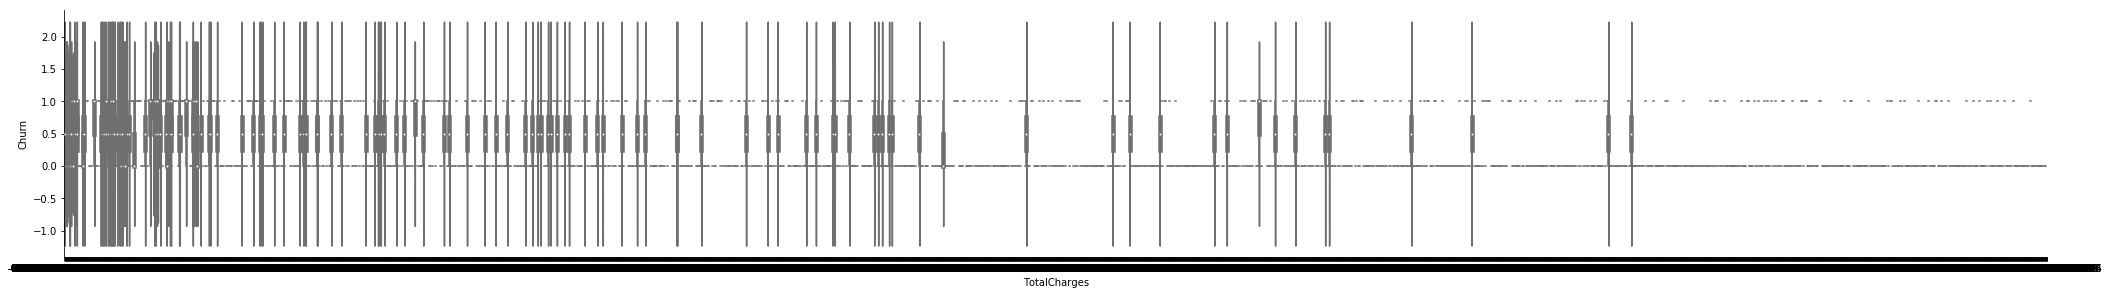

In [28]:
sns.catplot(x="SeniorCitizen",y="Churn",kind='bar',data=telecom_data)
sns.catplot(x="Partner",y="Churn", kind='bar',data=telecom_data)
sns.catplot(x="Dependents",y="Churn",kind='bar',data=telecom_data)
sns.catplot(x="PhoneService",y="Churn",kind='bar',data=telecom_data)
sns.catplot(x="PaperlessBilling",y="Churn",kind='bar',data=telecom_data)
sns.catplot(x="Contract_One year",y="Churn",kind='bar',data=telecom_data)
sns.catplot(x="Contract_Two year",y="Churn",kind='bar',data=telecom_data)
sns.catplot(x="PaymentMethod_Credit card (automatic)",y="Churn",kind='bar',data=telecom_data)
sns.catplot(x="PaymentMethod_Electronic check",y="Churn",kind='bar',data=telecom_data)
sns.catplot(x="PaymentMethod_Mailed check",y="Churn",kind='bar',data=telecom_data)
sns.catplot(x="gender_Male",y="Churn",kind='bar',data=telecom_data)
sns.catplot(x="MultipleLines_No",y="Churn",kind='bar',data=telecom_data)
sns.catplot(x="MultipleLines_Yes",y="Churn",kind='bar',data=telecom_data)
sns.catplot(x="InternetService_Fiber optic",y="Churn",kind='bar',data=telecom_data)
sns.catplot(x="InternetService_No",y="Churn",kind='bar',data=telecom_data)
sns.catplot(x="OnlineSecurity_No",y="Churn",kind='bar',data=telecom_data)
sns.catplot(x="OnlineSecurity_Yes",y="Churn",kind='bar',data=telecom_data)
sns.catplot(x="OnlineBackup_No",y="Churn",kind='bar',data=telecom_data)
sns.catplot(x="OnlineBackup_Yes",y="Churn",kind='bar',data=telecom_data)
sns.catplot(x="DeviceProtection_No",y="Churn",kind='bar',data=telecom_data)
sns.catplot(x="DeviceProtection_Yes",y="Churn",kind='bar',data=telecom_data)
sns.catplot(x="TechSupport_No",y="Churn",kind='bar',data=telecom_data)
sns.catplot(x="TechSupport_Yes",y="Churn",kind='bar',data=telecom_data)
sns.catplot(x="StreamingTV_No",y="Churn",kind='bar',data=telecom_data)
sns.catplot(x="StreamingTV_Yes",y="Churn",kind='bar',data=telecom_data)
sns.catplot(x="StreamingMovies_No",y="Churn",kind='bar',data=telecom_data)
sns.catplot(x="StreamingMovies_Yes",y="Churn",kind='bar',data=telecom_data)
sns.catplot(x="tenure", y="Churn", kind="violin",split=True, palette="pastel", data=telecom_data, height=4.2, aspect=7.0)
sns.catplot(x="MonthlyCharges", y="Churn", kind="violin",split=True, palette="pastel", data=telecom_data, height=4.2, aspect=7.0)
sns.catplot(x="TotalCharges", y="Churn", kind="violin",split=True, palette="pastel", data=telecom_data, height=4.2, aspect=7.0)


### Splitting data into a training set and a test set

In [29]:
#splitting data into a training set and a test set

# Putting feature variables to X
X = telecom_data.drop(['Churn','customerID'],axis=1)

# Putting response variable to y
y = telecom_data['Churn']

X.head()

,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,0,1,0,...,0,1,0,1,0,1,0,-1.280157,-1.161611,-0.994123
1,0,0,0,1,0,1,0,0,0,1,...,1,1,0,1,0,1,0,0.064298,-0.260859,-0.173727
2,0,0,0,1,1,0,0,0,0,1,...,0,1,0,1,0,1,0,-1.239416,-0.363897,-0.959581
3,0,0,0,0,0,1,0,0,0,0,...,1,0,1,1,0,1,0,0.512450,-0.747797,-0.195234
4,0,0,0,1,1,0,0,0,1,0,...,0,1,0,1,0,1,0,-1.239416,0.196164,-0.940391


In [30]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [31]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)


### Model Building

### Feature selection using Correlation Matrix

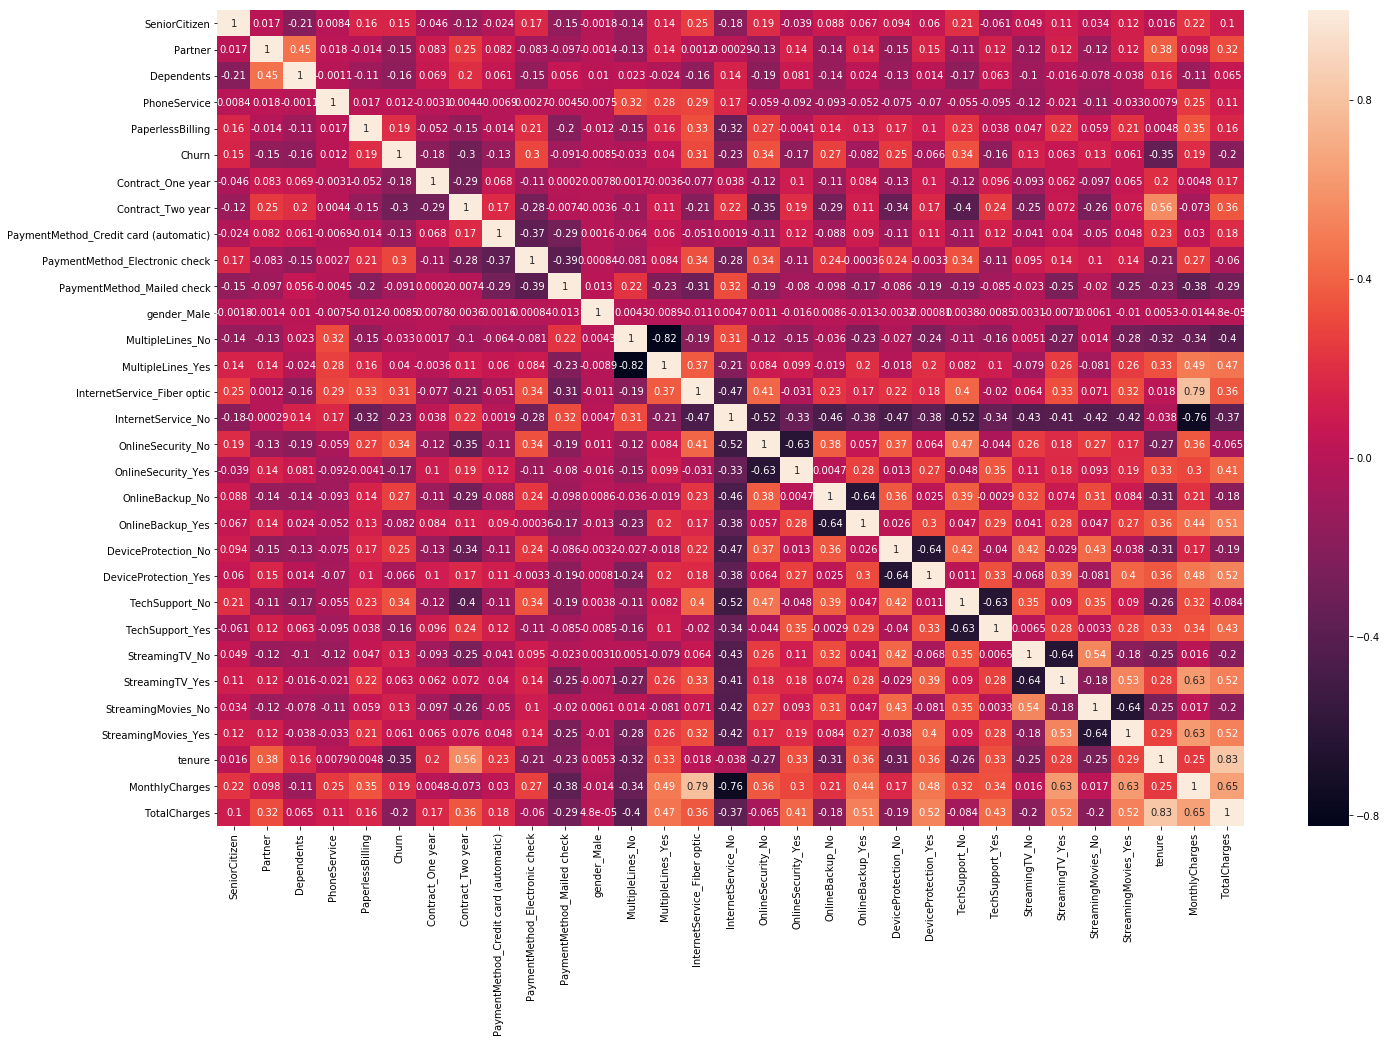

In [32]:
# correlation matrix 
plt.figure(figsize = (23,15))        # Size of the figure
sns.heatmap(telecom_data.corr(),annot = True)

### Dropping highly correlated variables.

In [33]:
X_test1 = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No', 'InternetService_No'],1)
X_train1 = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No' , 'InternetService_No'],1)

### Checking the Correlation Matrix

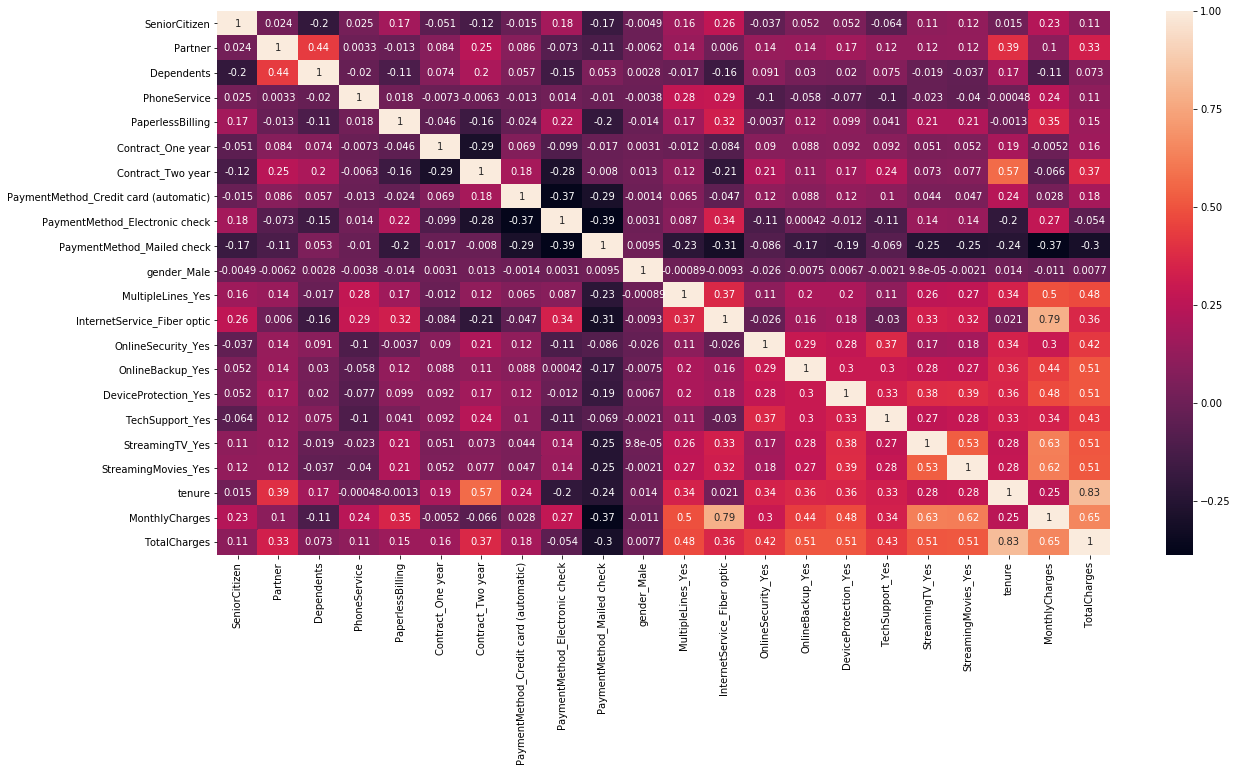

In [34]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train1.corr(),annot = True)

In [35]:
logsk = LogisticRegression()
logsk.fit(X_train1, y_train)
print("Training set accuracy: {:.3f}".format(logsk.score(X_train1, y_train)))
print("Test set accuracy: {:.3f}".format(logsk.score(X_test1, y_test)))

Training set accuracy: 0.808
Test set accuracy: 0.799


### Feature Selection Using RFE

In [36]:
logreg = LogisticRegression()
rfe = RFE(logreg, 13)             # running RFE with 13 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[False False False  True  True  True  True False  True False False  True
 False  True  True False  True False False False False False  True False
 False  True False  True False  True]
[ 2 18  6  1  1  1  1 11  1 12 14  1  8  1  1  4  1 15  5 13 10  7  1  3
 16  1 17  1  9  1]


In [37]:
# Variables selected by RFE 
col = ['PhoneService', 'PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check','MultipleLines_No','InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes','TechSupport_Yes','StreamingMovies_No','tenure','TotalCharges']

In [38]:
# running the model using the selected variables

logsk = LogisticRegression()
logsk.fit(X_train[col], y_train)
print("Training set accuracy: {:.3f}".format(logsk.score(X_train[col], y_train)))
print("Test set accuracy: {:.3f}".format(logsk.score(X_test[col], y_test)))

Training set accuracy: 0.805
Test set accuracy: 0.799


In [39]:
# Predicting probabilities
y_pred = logsk.predict_proba(X_test[col])

In [40]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [41]:
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

In [42]:
# Let's see the head
y_pred_1.head()

,1
0,0.504460
1,0.374805
2,0.005840
3,0.642393
4,0.007086


In [43]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [44]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [45]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [46]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [47]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})

In [48]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','Churn','Churn_Prob'], axis=1)

In [49]:
# the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,942,0,0.504460
1,3730,1,0.374805
2,1761,0,0.005840
3,2283,1,0.642393
4,1872,0,0.007086


In [50]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [51]:
y_pred_final.head()

,CustID,Churn,Churn_Prob,predicted
0,942,0,0.504460,1
1,3730,1,0.374805,0
2,1761,0,0.005840,0
3,2283,1,0.642393,1
4,1872,0,0.007086,0


### Model Evaluation

### Confusion matrix

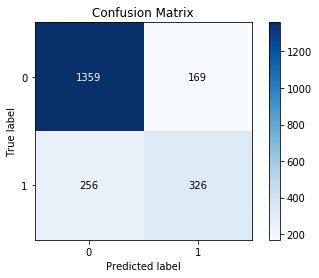

In [52]:
# Confusion matrix 
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix( y_pred_final.Churn, y_pred_final.predicted ) 

In [53]:
#overall accuracy.
accuracy= metrics.accuracy_score( y_pred_final.Churn, y_pred_final.predicted)
print (accuracy)

0.7985781990521327


In [54]:
confusion = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.predicted )
confusion
TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [55]:
recall = TP / float(TP+FN)
print (recall)

0.8414860681114551


In [56]:
Precision = TP / float(TP+FP)
print(Precision)

0.8893979057591623


In [57]:
F1 = 2*(Precision*recall)/(Precision+recall)
print (F1)

0.8647788736875597


### ROC Curve

In [58]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

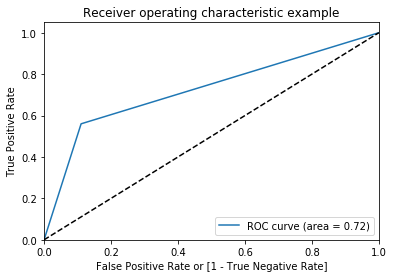

(array([0.        , 0.11060209, 1.        ]),
 array([0.        , 0.56013746, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [59]:
draw_roc(y_pred_final.Churn, y_pred_final.predicted)